<a href="https://colab.research.google.com/github/sundarjhu/AstrostatsIRyA2023/blob/main/Exam1_Rafael.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross-validation method
*   Powerful and highly realible.
*   It can be computationally expensive.
*   If the adjusted model is not linear, the chi-squared test can not be  implemented and we have no other option that use cross-validation.
*  The most straightforward approach is the "leave-one-out cross-validation". We have N data points and a set of models, our goal is to find the model that fits the data best.






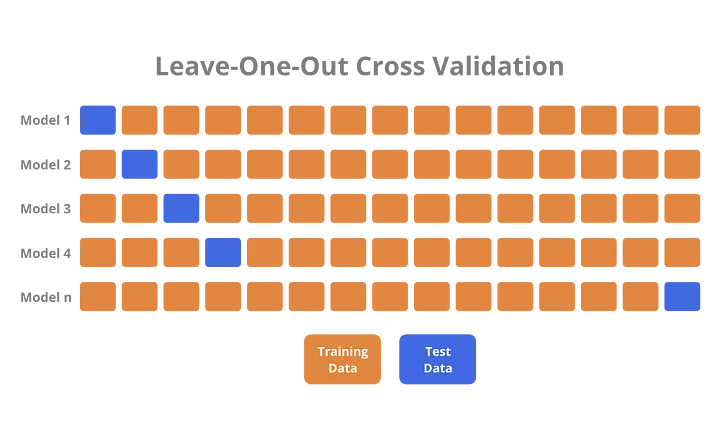

 We need to estimate the goodness of fit for each model in the following fashion:


1.   Remove the n-th data point from the data sample.
2.   Fit the model to the remaining N-1 data points.
3.   Take the model fitted to the N-1 data points and compute its likelihood for the n-th data point that has been left out.
4. Repeat steps 1 to 3 from n=1 to n=N and compute the goodness of the prediction of the whole data set by multiplying the likelihoods obtained in step 3.

In steps 3 and 4 we need to know the data's error distribution in prder to evaluate the goodness of the prediction.

Reapiting steps 1 to 3 N times is what makes leave-one-out cross-validation computational expensive.

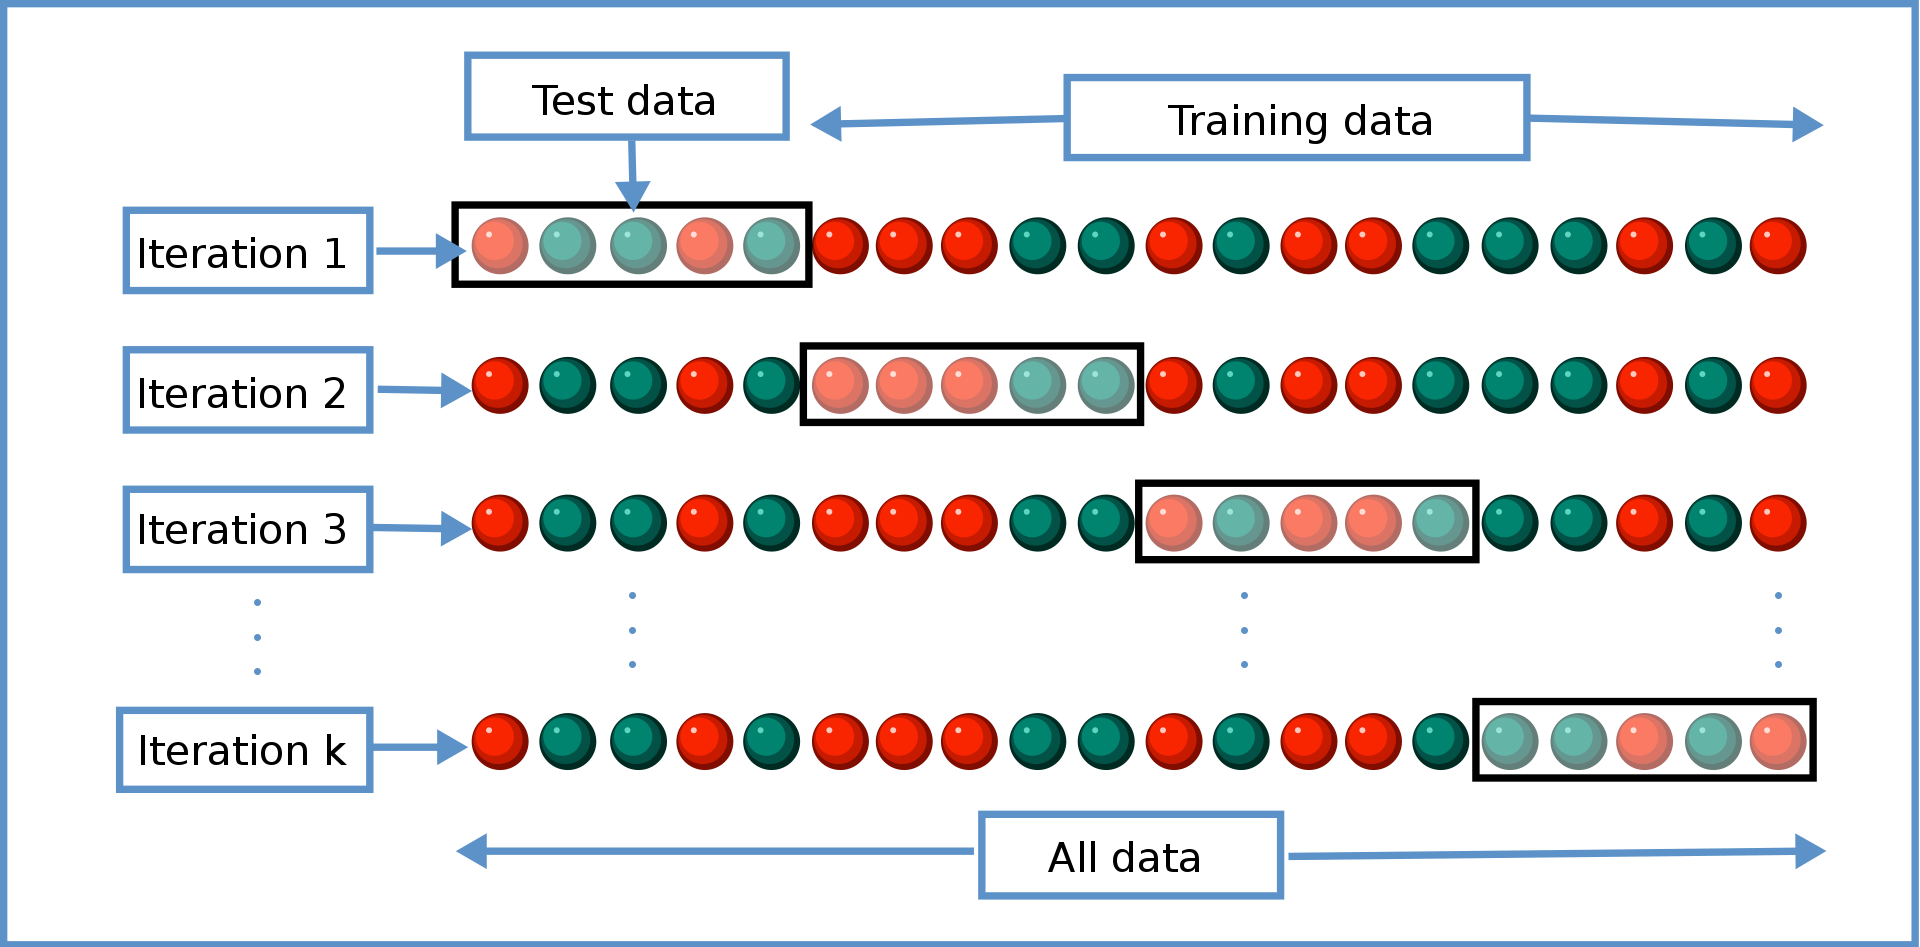

By Gufosowa - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=82298768

## We visualize our data

The shape of the array is:  (23, 3)


<ErrorbarContainer object of 3 artists>

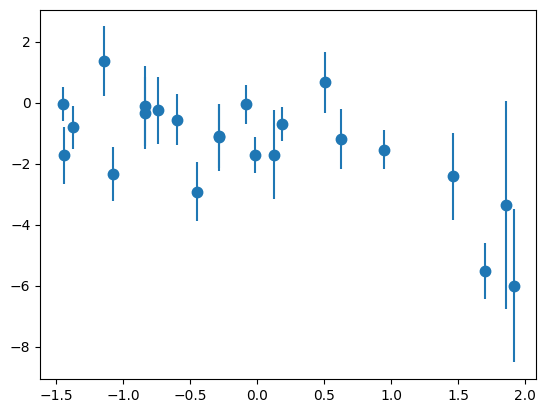

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data = np.loadtxt("Exam1.csv",skiprows=1, delimiter = ",")
data = np.loadtxt('https://www.irya.unam.mx/gente/s.srinivasan/Teaching/Statistics2023/Exams/Exam1.csv', delimiter=',', skiprows=1)
data_shape = data.shape
print("The shape of the array is: ", data_shape)

data_x,data_y,data_y_err = data[:,0],data[:,1],data[:,2]
data_y_err.shape

plt.scatter(data_x,data_y)
plt.errorbar(data_x,data_y,yerr = data_y_err,fmt='.',label='Data',ms=15)

## Linear adjustment

In [ ]:
p_linear,pcov_linear  = np.polyfit(data_x,data_y,1,w=1./data_y_err,cov='unscaled')

perr_linear = np.sqrt(np.diag(pcov_linear)) # Errors are detemined from the diagonals of the output covarience matrix

print('Best fit slope (m):     {:0.2f} +- {:0.2f} '.format(p_linear[0],perr_linear[0]))
print('Best fit intercept (b): {:0.1f} +- {:0.1f} '.format(p_linear[1],perr_linear[1]))

Best fit slope (m):     -0.76 +- 0.20 
Best fit intercept (b): -1.3 +- 0.2 


Text(-2.0, -8, 'b: -1.3 +- 0.2 ')

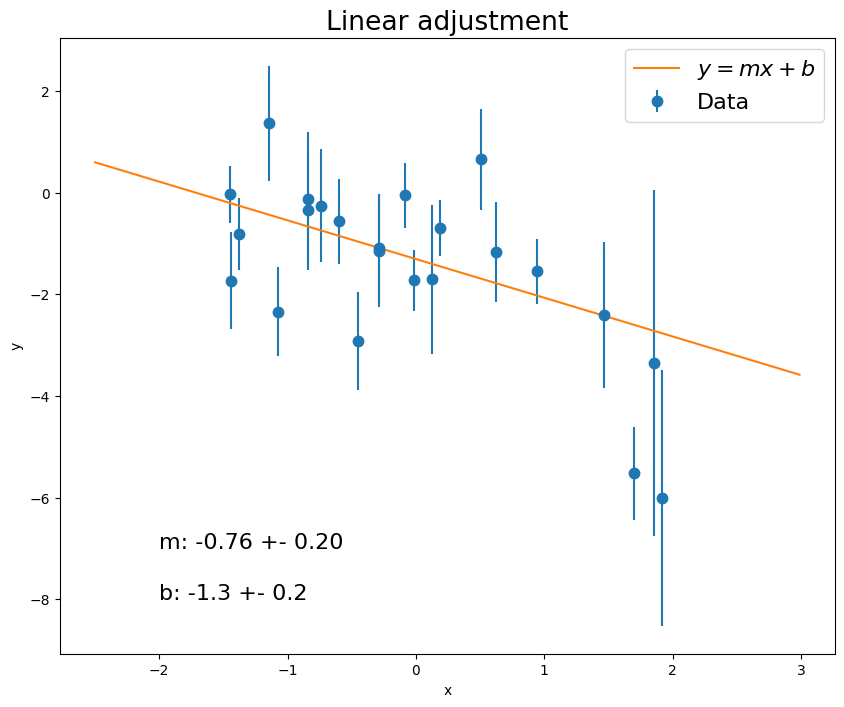

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
plt.rcParams.update({'font.size': 16})


plt.errorbar(data_x,data_y,yerr = data_y_err,fmt='.',label='Data',ms=15)

pfit_linear = np.poly1d(p_linear)
x=np.arange(-2.5,3.0,0.01)
plt.plot(x,pfit_linear(x),label=r'$y = mx+b $')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear adjustment')
plt.text(-2.0,-7,'m: {:0.2f} +- {:0.2f} '.format(p_linear[0],perr_linear[0]))
plt.text(-2.0,-8,'b: {:0.1f} +- {:0.1f} '.format(p_linear[1],perr_linear[1]))

## Quadratic adjustment

In [ ]:
p_quad,pcov_quad  = np.polyfit(data_x,data_y,2,w=1./data_y_err,cov='unscaled')

perr_quad = np.sqrt(np.diag(pcov_quad)) # Errors are detemined from the diagonals of the output covarience matrix

print('Best fit (a): {:0.2f} +- {:0.2f} '.format(p_quad[0],perr_quad[0]))
print('Best fit (b): {:0.1f} +- {:0.1f} '.format(p_quad[1],perr_quad[1]))
print('Best fit (c): {:0.1f} +- {:0.1f} '.format(p_quad[2],perr_quad[2]))

Best fit (a): -0.62 +- 0.20 
Best fit (b): -0.9 +- 0.2 
Best fit (c): -0.8 +- 0.3 


Text(-2.5, -8, 'c: -0.8 +- 0.3 ')

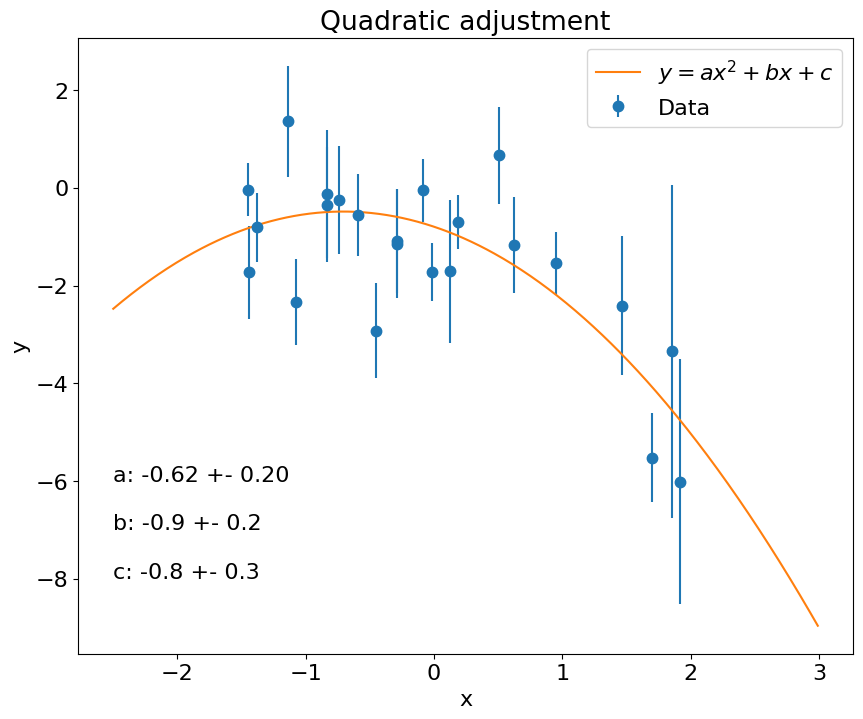

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
plt.rcParams.update({'font.size': 16})

plt.errorbar(data_x,data_y,yerr = data_y_err,fmt='.',label='Data',ms=15)

pfit_quad = np.poly1d(p_quad)
x=np.arange(-2.5,3.0,0.01)
plt.plot(x,pfit_quad(x),label=r'$y = ax^2+bx+c$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Quadratic adjustment')
plt.text(-2.5,-6,'a: {:0.2f} +- {:0.2f} '.format(p_quad[0],perr_quad[0]))
plt.text(-2.5,-7,'b: {:0.1f} +- {:0.1f} '.format(p_quad[1],perr_quad[1]))
plt.text(-2.5,-8,'c: {:0.1f} +- {:0.1f} '.format(p_quad[2],perr_quad[2]))

## Cubic adjustment

In [ ]:
p_cubic,pcov_cubic  = np.polyfit(data_x,data_y,3,w=1./data_y_err,cov='unscaled')

perr_cubic = np.sqrt(np.diag(pcov_cubic)) # Errors are detemined from the diagonals of the output covarience matrix

print('Best fit (a): {:0.2f} +- {:0.2f} '.format(p_cubic[0],perr_cubic[0]))
print('Best fit (b): {:0.1f} +- {:0.1f} '.format(p_cubic[1],perr_cubic[1]))
print('Best fit (c): {:0.1f} +- {:0.1f} '.format(p_cubic[2],perr_cubic[2]))
print('Best fit (d): {:0.1f} +- {:0.1f} '.format(p_cubic[2],perr_cubic[2]))

Best fit (a): -0.67 +- 0.26 
Best fit (b): -0.5 +- 0.2 
Best fit (c): 0.4 +- 0.5 
Best fit (d): 0.4 +- 0.5 


Text(-2.3, -13, 'd: -0.8 +- 0.3 ')

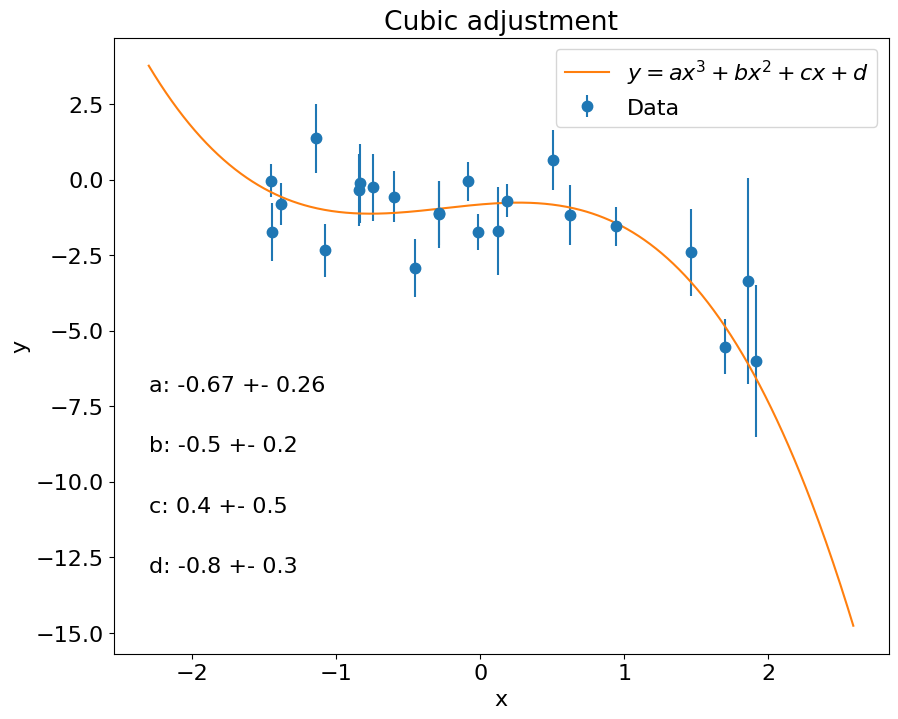

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
plt.rcParams.update({'font.size': 16})

plt.errorbar(data_x,data_y,yerr = data_y_err,fmt='.',label='Data',ms=15)

pfit_cubic = np.poly1d(p_cubic)
x=np.arange(-2.3,2.6,0.01)
plt.plot(x,pfit_cubic(x),label=r'$y = ax^3+bx^2+cx+d$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Cubic adjustment')
plt.text(-2.3,-7,'a: {:0.2f} +- {:0.2f} '.format(p_cubic[0],perr_cubic[0]))
plt.text(-2.3,-9,'b: {:0.1f} +- {:0.1f} '.format(p_cubic[1],perr_cubic[1]))
plt.text(-2.3,-11,'c: {:0.1f} +- {:0.1f} '.format(p_cubic[2],perr_cubic[2]))
plt.text(-2.3,-13,'d: {:0.1f} +- {:0.1f} '.format(p_cubic[3],perr_cubic[3]))

## Quartic adjustment

In [ ]:
p_quart,pcov_quart = np.polyfit(data_x,data_y,4,w=1./data_y_err,cov='unscaled')

perr_quart = np.sqrt(np.diag(pcov_quart)) # Errors are detemined from the diagonals of the output covarience matrix

print('Best fit (a): {:0.2f} +- {:0.2f} '.format(p_quart[0],perr_quart[0]))
print('Best fit (b): {:0.1f} +- {:0.1f} '.format(p_quart[1],perr_quart[1]))
print('Best fit (c): {:0.1f} +- {:0.1f} '.format(p_quart[2],perr_quart[2]))
print('Best fit (d): {:0.1f} +- {:0.1f} '.format(p_quart[3],perr_quart[3]))
print('Best fit (e): {:0.1f} +- {:0.1f} '.format(p_quart[4],perr_quart[4]))

Best fit (a): -0.16 +- 0.31 
Best fit (b): -0.6 +- 0.3 
Best fit (c): -0.1 +- 0.8 
Best fit (d): 0.3 +- 0.5 
Best fit (e): -0.9 +- 0.3 


Text(-2.0, -12, 'e: -0.9 +- 0.3 ')

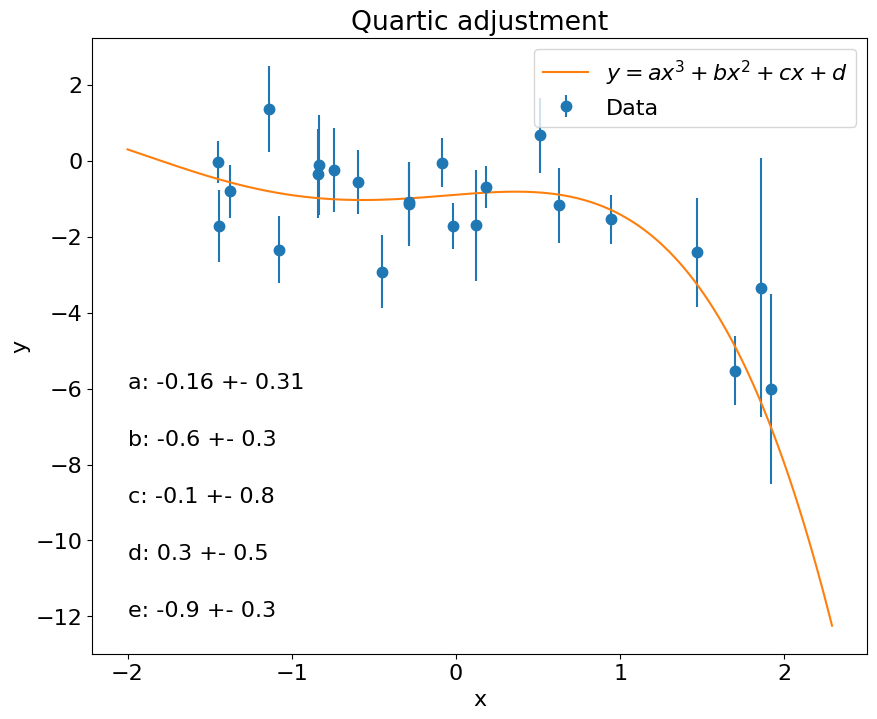

In [ ]:
fig,ax = plt.subplots(figsize=(10,8))
plt.rcParams.update({'font.size': 16})

plt.errorbar(data_x,data_y,yerr = data_y_err,fmt='.',label='Data',ms=15)

pfit_quart = np.poly1d(p_quart)
x=np.arange(-2.0,2.3,0.01)
plt.plot(x,pfit_quart(x),label=r'$y = ax^3+bx^2+cx+d$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Quartic adjustment')
plt.text(-2.0,-6,'a: {:0.2f} +- {:0.2f} '.format(p_quart[0],perr_quart[0]))
plt.text(-2.0,-7.5,'b: {:0.1f} +- {:0.1f} '.format(p_quart[1],perr_quart[1]))
plt.text(-2.0,-9,'c: {:0.1f} +- {:0.1f} '.format(p_quart[2],perr_quart[2]))
plt.text(-2.0,-10.5,'d: {:0.1f} +- {:0.1f} '.format(p_quart[3],perr_quart[3]))
plt.text(-2.0,-12,'e: {:0.1f} +- {:0.1f} '.format(p_quart[4],perr_quart[4]))

(array([7., 9., 3., 2., 0., 0., 1., 0., 0., 1.]),
 array([0.55214384, 0.83751097, 1.12287811, 1.40824524, 1.69361237,
        1.97897951, 2.26434664, 2.54971378, 2.83508091, 3.12044804,
        3.40581518]),
 <BarContainer object of 10 artists>)

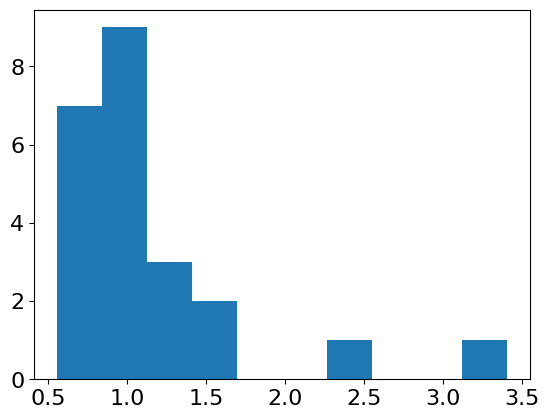

In [ ]:
plt.hist(data_y_err)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a3bbc46a380>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3bbc46a8c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3bbc46a0e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3bbc46ae00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3bbc46b340>],
 'means': [<matplotlib.lines.Line2D at 0x7a3bbc46b0a0>]}

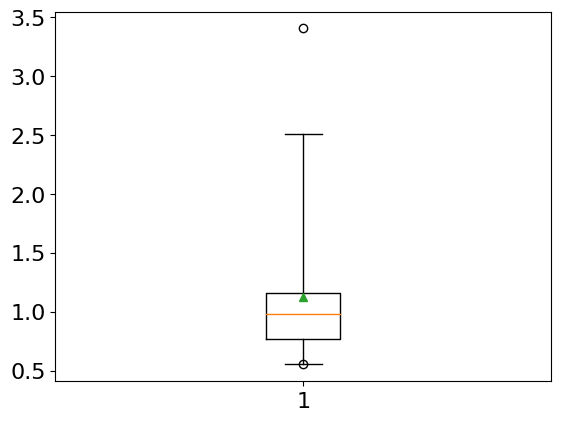

In [ ]:
plt.boxplot(data_y_err, whis=[2.5, 97.5], showmeans=True)

For the sake of simplicity less assume that errors are gaussian distributed. Then, the likelihood function will be

$\mathcal{L} = p(X|\vec{\theta}) = \mathcal{N} (X|\vec{\theta}) = \mathcal{N} (X|\mu, \sigma^2)$.

Computationally speaking, it is better to work with log-likelihoods

$\log \mathcal{L} = \mathcal{l} = \sum_{n=1}^N \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp{\left(-\frac{1}{2} \frac{\left( x_n -\mu\right)^2}{\sigma^2} \right)} \right)$.

We can consider the first therm constant  

$\mathcal{l} = \sum_{n=1}^N \log \left( \text{cst.} \exp{\left(-\frac{1}{2} \frac{\left( x_n -\mu\right)^2}{\sigma^2} \right)} \right)$,

having that the log-likelihood is

$\mathcal{l} = \sum_{n=1}^N \left(-\frac{1}{2} \frac{\left( x_n -\mu\right)^2}{\sigma^2} \right)$.



In [ ]:
from sklearn.model_selection import LeaveOneOut
def loglikelihood(sigma,y_obs,y_model):
    return - (0.5*((y_obs-y_model)/sigma)**2)

loo = LeaveOneOut()
pfits_quad = []
pfits_cubic = []
pfits_quart = []

likelihood_quad =[]
likelihood_cubic =[]
likelihood_quart =[]

residues_quad = []
residues_cubic = []
residues_quart = []

for train_index, test_index in loo.split(data_x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = data_x[train_index], data_x[test_index]
    y_train, y_test = data_y[train_index], data_y[test_index]
    y_err_train, y_err_test = data_y_err[train_index], data_y_err[test_index]

    p_quad,pcov_quad  = np.polyfit(x_train,y_train,2,w=1./y_err_train,cov='unscaled')
    perr_quad = np.sqrt(np.diag(pcov_quad))
    pfit_quad = np.poly1d(p_quad)
    likelihood_quad.append( loglikelihood(y_err_test, y_test, pfit_quad(x_test)) )
    pfits_quad.append(pfit_quad)
    residues_quad.append(( (y_test - pfit_quad(x_test)) / y_err_test)**2)

    p_cubic,pcov_cubic  = np.polyfit(x_train,y_train,3,w=1./y_err_train,cov='unscaled')
    perr_cubic = np.sqrt(np.diag(pcov_cubic))
    pfit_cubic = np.poly1d(p_cubic)
    likelihood_cubic.append( loglikelihood(y_err_test, y_test, pfit_cubic(x_test)) )
    pfits_cubic.append(pfit_cubic)
    residues_cubic.append(( (y_test - pfit_cubic(x_test)) / y_err_test)**2)

    p_quart,pcov_quart  = np.polyfit(x_train,y_train,4,w=1./y_err_train,cov='unscaled')
    perr_quart = np.sqrt(np.diag(pcov_quart))
    pfit_quart = np.poly1d(p_quart)
    likelihood_quart.append( loglikelihood(y_err_test, y_test, pfit_quart(x_test)) )
    pfits_quart.append(pfit_quart)
    residues_quart.append(( (y_test - pfit_quart(x_test)) / y_err_test)**2)

In [ ]:
goodness_quad = sum(likelihood_quad)
goodness_cubic = sum(likelihood_cubic)
goodness_quart = sum(likelihood_quart)

In [ ]:
print("The goodness of the quadratic model is: ", np.round(goodness_quad,2))
print("The goodness of the cubic model is: ", np.round(goodness_cubic,2))
print("The goodness of the quartic model is: ", np.round(goodness_quart,2))

The goodness of the quadratic model is:  [-23.9]
The goodness of the cubic model is:  [-16.93]
The goodness of the quartic model is:  [-19.36]


This means that the cubic model has the best goodness.


## Bayes K test

Now we can use the Bayes K Factor

$K = \frac{Pr(D|M_1)}{Pr(D|M_2)}$

 to test the models against each other.


In [ ]:
K12 = goodness_cubic-goodness_quad
K23 = goodness_cubic -goodness_quart
K13 = goodness_quart-goodness_quad

print("The factor K of the cubic model w.r.t the quadratic model is: ", np.round(np.exp(K12),2))
print("The factor K of the cubic model w.r.t the quartic model is: ", np.round(np.exp(K23),2))
print("The factor K of the quartic model w.r.t the quadratic model is: ", np.round(np.exp(K13),2))

The factor K of the cubic model w.r.t the quadratic model is:  [1054.54]
The factor K of the cubic model w.r.t the quartic model is:  [11.33]
The factor K of the quartic model w.r.t the quadratic model is:  [93.04]


The cubic model is decisive better compare with the cuadratic. Between the quadratic and the quartic model one would choose the later one, as it is "very strong".

## $\chi^2$-test
Now we can do a Chi-squared test in order to compare with our results.

In [ ]:
chiquad = sum(((data_y - pfit_quad(data_x))/data_y_err)**2)/22
chicubic = sum(((data_y - pfit_cubic(data_x))/data_y_err)**2)/22
chiquart = sum(((data_y - pfit_quart(data_x))/data_y_err)**2)/22

print("The chi-sqaured test of the quadratic model is:", np.round(chiquad,2))
print("The chi-sqaured test of the cubic model is:", np.round(chicubic,2))
print("The chi-sqaured test of the quartic model is:", np.round(chiquart,2))

The chi-sqaured test of the quadratic model is: 1.36
The chi-sqaured test of the cubic model is: 1.05
The chi-sqaured test of the quartic model is: 1.04


This means that acording to the $\chi^2$ test, the cubic and the quartic model work equally well.  

# Example 1: A reflective, metal-rich atmosphere for GJ 1214b from its JWST phase curve (Nature, Volume 620, Issue 7972, p.67-71).

Autors mention that there is an absence of planets intermediate in size between the Earth and Neptune in the Solar System, yet these objects are quite common around other stars. Close-in planets of this size range bifurcate into two classes based on their radii. It has been proposed that the ones with larger radii can be distinguished by having hydrogen dominated atmospheres. The autors study GJ 1214b as a good archetype of this kind of planets. The measured spectra of this planet is featurless due to aerosols in the planet's atmosphere. Nevertheless the autors report a spectroscopic thermal phase curve of GJ1215b obtained with JWST in the mid-infrared. The dayside spectra ($553\pm 9$) K and the nightside spectra ($437 \pm 19$) K  show 3 $\sigma$ evidence of absorption features, being $\text{H_2 O}$ the most likely cause. In order to prove this, they perform leave-one-out cross validation to the atmospheric models proposed for the planent. The ones that take in account H2O have a higger detection significance.

The planet has a radius of 2.6 terrestial radius and orbits a late M dwarf host star with a period of 37.9 hours.

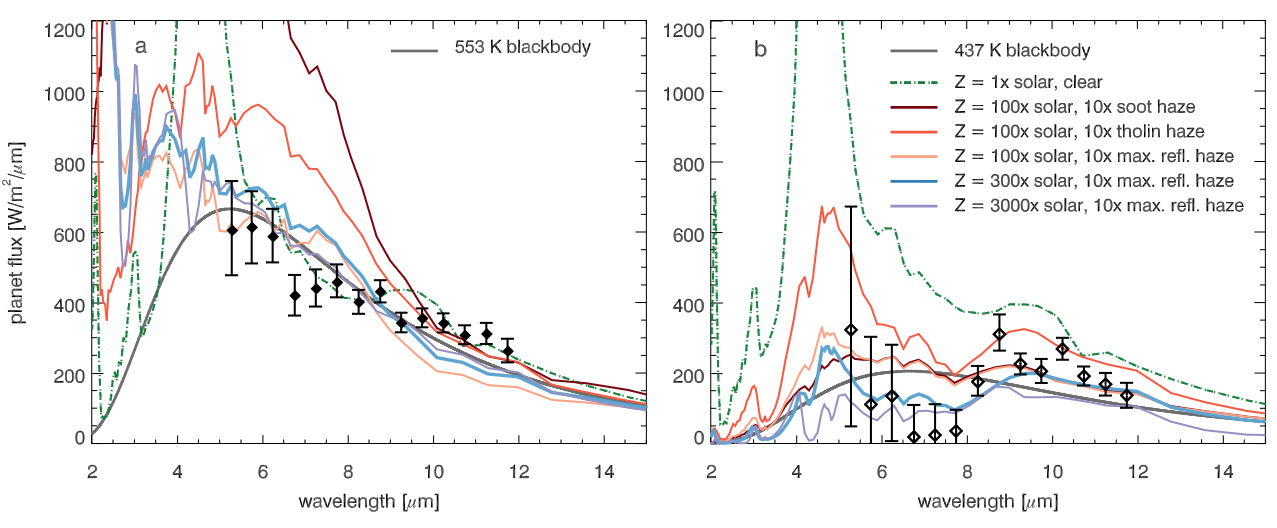

Kempton et al 2023. Spectra with 1-σ error bars, adjusted blackbody and models with different chemical composition.




To constrain the planet's atmospheric compositons, aerosol properties, and atmospheric dynamics, the autors ran a set of 3-D general circulation models (GCMs) spanning compositions fram solar metallicity to high mean molecular weight atmospheres.

The fit that best match the broadmabd MIRI phase curve is matched by GCM simulations that include high metallicity excess and a thick haze composed of highly reflective aeresols.

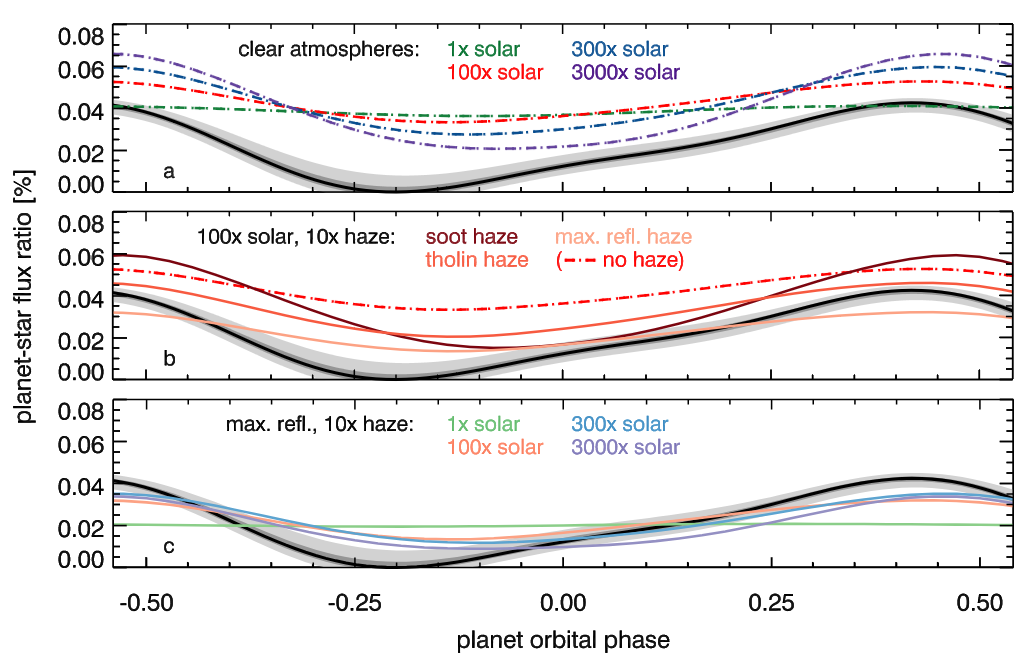

Kempton et al 2023.

For each model spectrum computed in the parametes exploration, the autors have calculated the likelihood assuming symetric error bars on the data. They explore several cases with a range of atmospheric opacity sources (diffent opacity molecules). Then they calculate the detection significance. In all models, the H2O significance is the bigger one (always above 2 σ). The LOO-CV is used to futher assess robustness of H2O detections on the dayside and nightside spectra. They compute the expected log pointwise predictive density (quantifies the ability of the fitted model to predict unseen data), leaving one point of the data out. After this, they use the difference between the log pointwise predictive density of two different models divided by the standard error as a model comparison. Models with H2O have higher scores, in other words the inclusion of of H2O absorpition improves the predictive performance of the model.  

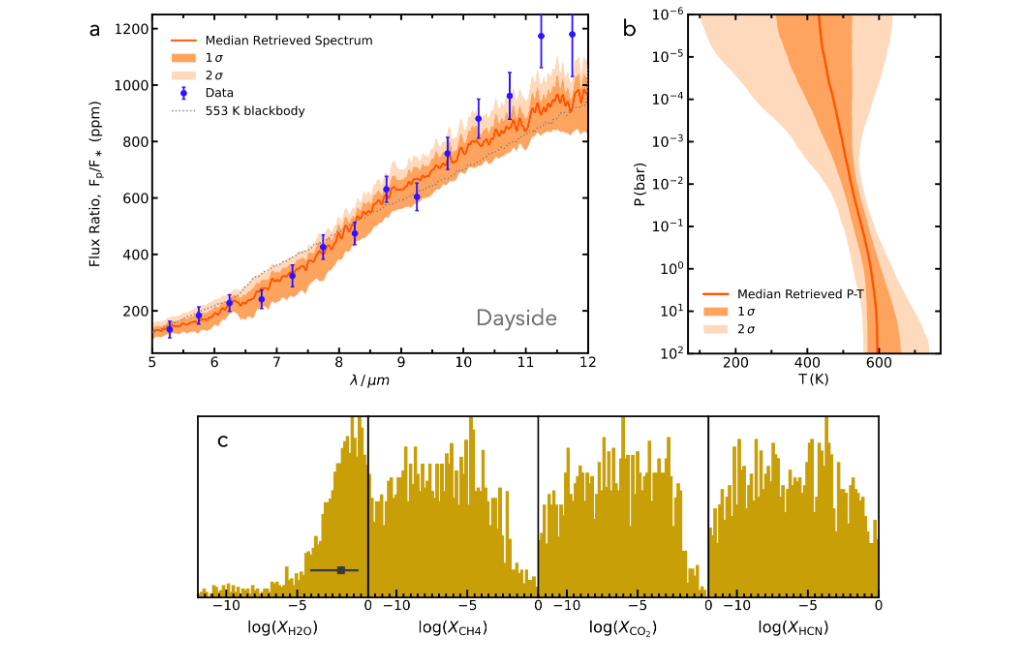

Kempton et al 2023.

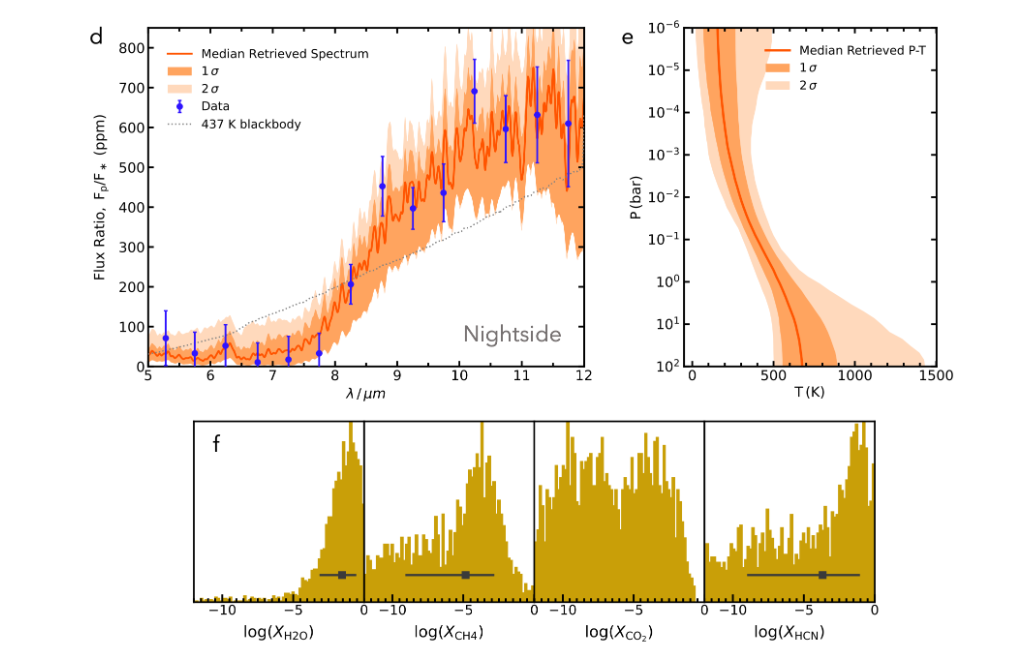

Kempton et al 2023.

In a and d the best-fit retrieved spectra,
and  Dark red lines show the median retrieved spectrum and temperature profile, while dark/light shading shows the 1σ and 2σ contours, respectively. In c and f the posterior probability distributions
for the abundances of H2O, CO2, CH4 and HCN on the dayside and nightside, respectively, are shown.